In [2]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_csv('Computers2.csv')

In [4]:
train.isnull().sum()

price      0
speed      0
hd         0
ram        0
screen     0
cd         0
premium    0
dtype: int64

In [5]:
train.head()

,price,speed,hd,ram,screen,cd,premium
0,1499,25,80,4,14,no,yes
1,1795,33,85,2,14,no,yes
2,1595,25,170,4,15,no,yes
3,1849,25,170,8,14,no,no
4,3295,33,340,16,14,no,yes


In [6]:
df_train = pd.DataFrame()
print((train.groupby('premium')).size())

premium
no       82
yes    1417
dtype: int64


In [7]:
prem={'yes':0,'no':1}
cd_c={'yes':0,'no':1}

In [8]:
def clean_prem(x):
    return prem[x]
def clean_cd_c(x):
    return cd_c[x]

In [9]:
df_train['price']=train['price']
df_train['speed']=train['speed']
df_train['hd']=train['hd']
df_train['ram']=train['ram']
df_train['screen']=train['screen']
df_train['cd']=train['cd'].apply(clean_cd_c)
df_train['premium']=train['premium'].apply(clean_prem)

In [10]:
df_train.head()

,price,speed,hd,ram,screen,cd,premium
0,1499,25,80,4,14,1,0
1,1795,33,85,2,14,1,0
2,1595,25,170,4,15,1,0
3,1849,25,170,8,14,1,1
4,3295,33,340,16,14,1,0


In [11]:
print(df_train.shape)

(1499, 7)


In [12]:
print(df_train.describe()) 

             price        speed           hd          ram       screen  \
count  1499.000000  1499.000000  1499.000000  1499.000000  1499.000000   
mean   2369.602402    44.272849   269.726484     7.012675    14.422949   
std     624.745680    15.371010   150.546512     4.258249     0.787863   
min     999.000000    25.000000    80.000000     2.000000    14.000000   
25%    1899.000000    33.000000   170.000000     4.000000    14.000000   
50%    2295.000000    33.000000   245.000000     8.000000    14.000000   
75%    2720.000000    66.000000   340.000000     8.000000    15.000000   
max    4999.000000    66.000000  1370.000000    16.000000    17.000000   

                cd      premium  
count  1499.000000  1499.000000  
mean      0.845230     0.054703  
std       0.361806     0.227476  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  


In [13]:
print((df_train.groupby('premium')).size())

premium
0    1417
1      82
dtype: int64


[]

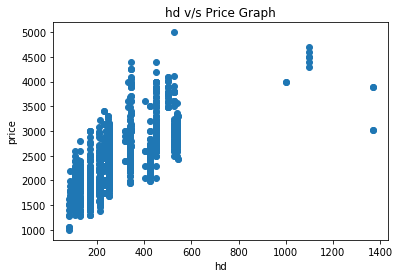

In [14]:
plt.scatter(df_train['hd'], df_train['price'])
plt.title('hd v/s Price Graph')
plt.xlabel('hd')
plt.ylabel('price')
plt.plot()

In [15]:
Y = df_train.iloc[:,:-6].values
Y.astype('int')
print(Y)

[[1499]
 [1795]
 [1595]
 ...
 [2895]
 [2029]
 [1699]]


In [16]:
df_train1 = df_train.copy()
del df_train1['price']

X=df_train1.iloc[::].values
print(X)

[[ 25  80   4  14   1   0]
 [ 33  85   2  14   1   0]
 [ 25 170   4  15   1   0]
 ...
 [ 50 528  16  14   1   0]
 [ 33 120   4  14   1   1]
 [ 33 210   4  15   1   0]]


In [17]:
std_x = StandardScaler()
std_y = StandardScaler()
X = std_x.fit_transform(X)
Y = std_y.fit_transform(Y)
print(X)

[[-1.2542624  -1.26067219 -0.70772767 -0.53700937  0.4279132  -0.24055922]
 [-0.73362845 -1.22744878 -1.17756105 -0.53700937  0.4279132  -0.24055922]
 [-1.2542624  -0.66265079 -0.70772767  0.73267051  0.4279132  -0.24055922]
 ...
 [ 0.37271868  1.71614542  2.11127262 -0.53700937  0.4279132  -0.24055922]
 [-0.73362845 -0.9948849  -0.70772767 -0.53700937  0.4279132   4.15698061]
 [-0.73362845 -0.39686351 -0.70772767  0.73267051  0.4279132  -0.24055922]]


In [18]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.20, random_state=20)
print(train_X)

[[-0.73362845 -0.13107622 -0.70772767 -0.53700937 -2.33692253 -0.24055922]
 [-0.73362845 -0.39686351 -0.70772767  3.27203026  0.4279132  -0.24055922]
 [ 0.37271868 -1.08126577 -1.17756105 -0.53700937  0.4279132  -0.24055922]
 ...
 [ 1.41398657  1.53009432  0.23193909 -0.53700937 -2.33692253 -0.24055922]
 [-0.73362845 -0.66265079 -0.70772767 -0.53700937  0.4279132  -0.24055922]
 [ 1.41398657  0.46694518  0.23193909  0.73267051  0.4279132  -0.24055922]]


In [19]:
print(test_X)

[[-0.73362845 -1.08126577 -1.17756105 -0.53700937 -2.33692253 -0.24055922]
 [ 0.37271868  0.46694518  2.11127262 -0.53700937  0.4279132  -0.24055922]
 [ 0.37271868  0.46694518  0.23193909  0.73267051  0.4279132  -0.24055922]
 ...
 [ 0.37271868 -0.13107622  0.23193909  0.73267051  0.4279132  -0.24055922]
 [-0.73362845 -0.66265079 -0.70772767 -0.53700937  0.4279132  -0.24055922]
 [-0.73362845 -0.13107622  0.23193909  3.27203026  0.4279132  -0.24055922]]


In [20]:
print(train_Y)

[[-0.80796205]
 [ 0.56905748]
 [-1.08016358]
 ...
 [ 2.6425927 ]
 [-0.75992648]
 [ 0.52742666]]


In [21]:
print(test_Y)

[[-0.60140912]
 [ 0.84125901]
 [ 0.20718956]
 [ 1.83399402]
 [ 0.11912436]
 [ 0.08870183]
 [-0.76793241]
 [-0.12745821]
 [-0.92805096]
 [ 0.35289744]
 [-0.31159454]
 [ 0.52102192]
 [-0.07141672]
 [ 0.51301599]
 [ 0.56105155]
 [-1.15381811]
 [ 1.00137756]
 [-0.99369957]
 [-0.51174273]
 [ 0.03266034]
 [ 0.36730811]
 [-0.76793241]
 [ 1.32161466]
 [-1.40040068]
 [ 1.00137756]
 [-0.27957083]
 [-1.08016358]
 [ 0.59948   ]
 [ 0.19277889]
 [ 1.00137756]
 [-0.63183164]
 [-0.59340319]
 [-0.04099419]
 [ 0.78361634]
 [-0.8351822 ]
 [-0.19951156]
 [-0.11304754]
 [-1.24828806]
 [-1.72063778]
 [-1.39399594]
 [ 1.00137756]
 [-0.43328464]
 [-0.59340319]
 [ 0.51301599]
 [ 0.84766376]
 [ 0.03266034]
 [-0.03939301]
 [-0.27316609]
 [ 1.2399542 ]
 [ 0.83325309]
 [ 1.00778231]
 [-0.75352174]
 [ 0.36090337]
 [-1.16182404]
 [-1.72063778]
 [ 0.12713028]
 [ 0.0806959 ]
 [ 0.44096264]
 [-0.75352174]
 [-0.80796205]
 [ 0.16876111]
 [-0.27957083]
 [-0.92004503]
 [ 0.27924291]
 [ 0.51301599]
 [-1.37798408]
 [-0.11945

In [22]:
regressor = DecisionTreeRegressor()
regressor.fit(train_X, train_Y)
test_score= regressor.score(test_X, test_Y)
training_score= regressor.score(train_X, train_Y)

In [23]:
print("the training score is ....." ,training_score)
print("the testing score is ....." ,test_score)

the training score is ..... 0.9268784015876407
the testing score is ..... 0.8800377618697721


In [24]:
Y_pred =regressor.predict(test_X)
rmse =np.sqrt(mean_squared_error(test_Y,Y_pred))

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(test_Y,Y_pred)
print("r2_score : ",r2)

r2_score :  0.8800377618697721


In [26]:
print("the Root Mean Square Error is .... ",rmse)

the Root Mean Square Error is ....  0.32764938163609797


Text(0.1, 7, 'Rmse = 0.317683 Score =0.9268784015876407')

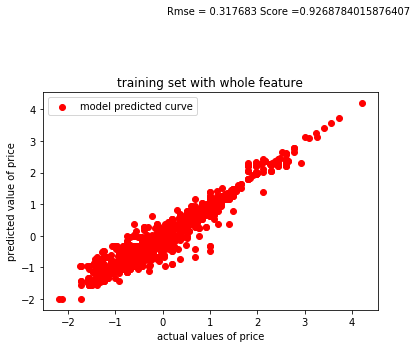

In [68]:
%matplotlib inline
plt.scatter(train_Y,regressor.predict(train_X),color='red',label='model predicted curve')
plt.title('training set with whole feature')
plt.xlabel('actual values of price')
plt.ylabel('predicted value of price')
plt.legend(loc='upper left')
plt.text(0.1,7, 'Rmse = %f Score =%s' %(rmse,training_score))

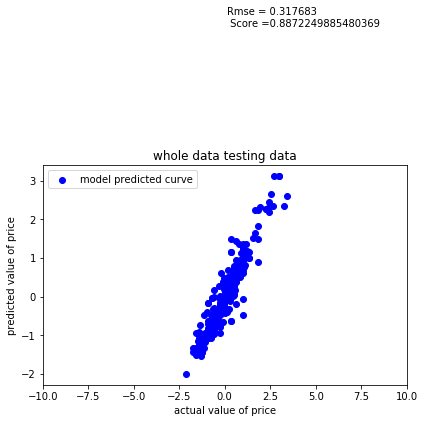

In [69]:
plt.scatter(test_Y,regressor.predict(test_X),color='blue',label='model predicted curve')
plt.title('whole data testing data')
plt.xlabel('actual value of price')
plt.ylabel('predicted value of price')
plt.xlim(-10, 10)
plt.tight_layout()
plt.legend(loc='upper left')
plt.text(0.1,7, 'Rmse = %f \n Score =%s' %(rmse,test_score))

plt.show()